Chapter 8: Dynamic Social Networks

Script 8-1: Create example dynamic network to plot

In [30]:
#create Figure 8-4
#import packages
import dynetx as dn

#create an empty graph
g = dn.DynGraph()

#add vertices and edges with time information added
g.add_interaction(u="D", v="E", t=0, e=2) # adding the edge ("D","E") at t=0 that vanishes at time e=2
g.add_interactions_from([("C", "F"), ("F", "E")], t=1) # adding some edges at time t=1
g.add_interactions_from([("B", "E"), ("A", "B")], t=2) # adding some edges at time t=2
g.add_interactions_from([("B", "C"),("C","D")], t=3) # adding some edges at time t=3
g.add_interaction(u="A", v="C", t=4) # adding some edges at time t=4

snaptshot at t =  0


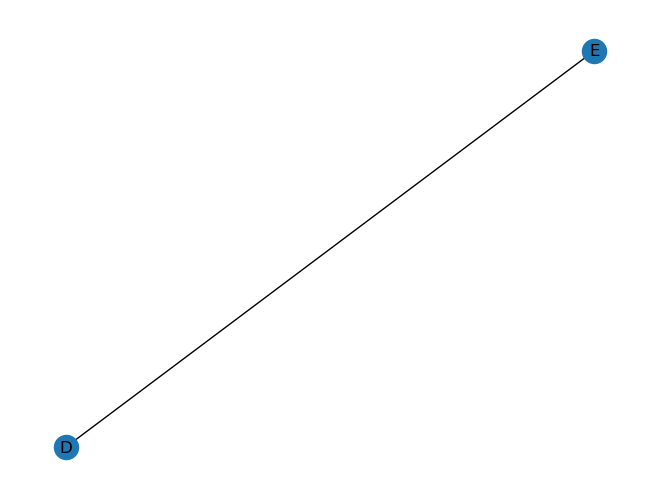

snaptshot at t =  1


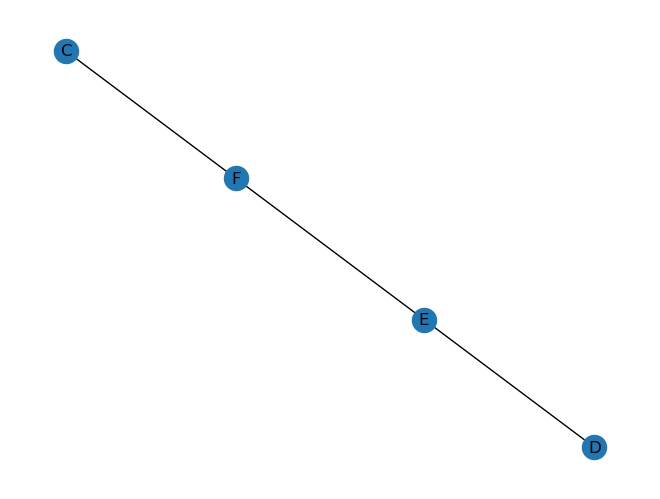

snaptshot at t =  2


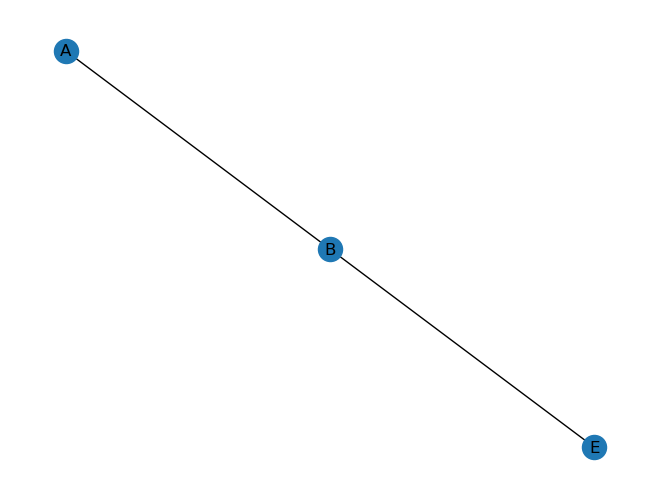

snaptshot at t =  3


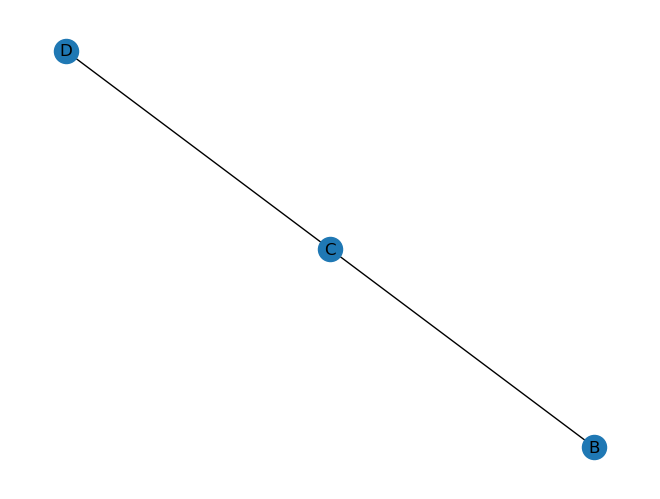

snaptshot at t =  4


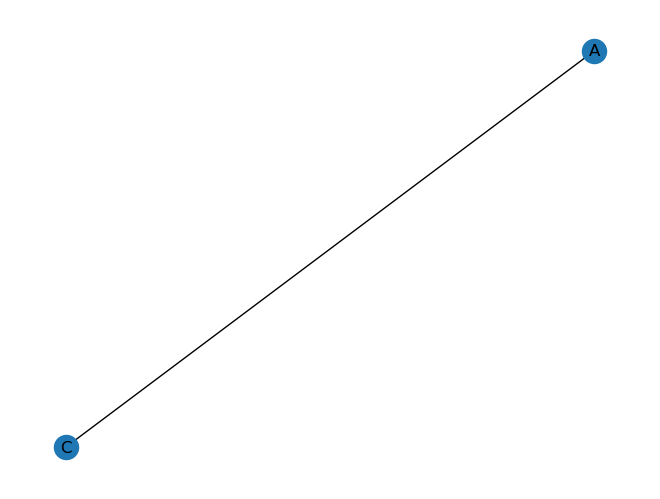

In [31]:
#create plots for each time point
for i in range (5):
    g1 = g.time_slice(i)
    nx.draw(g1,with_labels=True)
    print ("snaptshot at t = ", i)
    plt.show()

In [32]:
#create lists of edges at each time point
for i in range (5):
    g1 = g.time_slice(i)
    print ("snaptshot at t = ", i)
    print(g1.edges())

snaptshot at t =  0
[('D', 'E')]
snaptshot at t =  1
[('D', 'E'), ('E', 'F'), ('F', 'C')]
snaptshot at t =  2
[('E', 'B'), ('B', 'A')]
snaptshot at t =  3
[('D', 'C'), ('C', 'B')]
snaptshot at t =  4
[('C', 'A')]


In [33]:
#print interaction stream
for i in g.stream_interactions():
    print(i)

('D', 'E', '+', 0)
('C', 'F', '+', 1)
('F', 'E', '+', 1)
('D', 'E', '-', 2)
('B', 'E', '+', 2)
('A', 'B', '+', 2)
('B', 'C', '+', 3)
('C', 'D', '+', 3)
('A', 'C', '+', 4)


Script 8-2: Crocodiles network deep dive

In [3]:
#import packages
import networkx as nx
import dynetx as dn
from past.builtins import xrange
import matplotlib.pyplot as plt

In [3]:
#create a dynamic graph object
crocodile = dn.DynGraph() # empty dynamic graph

In [4]:
#fill in relevant interactions
crocodile.add_interaction(u="Croc1", v="Croc2",t=0)
crocodile.add_interactions_from([("Croc1","Croc2"),("Croc3","Croc4")],t=1)
crocodile.add_interactions_from([("Croc1","Croc2"),("Croc3","Croc4")],t=2)
crocodile.add_interactions_from([("Croc1","Croc2")],t=3)
crocodile.add_interactions_from([("Croc1","Croc2"),("Croc2","Croc3")],t=4)
crocodile.add_interactions_from([("Croc1","Croc2"),("Croc2","Croc3")],t=5)
crocodile.add_interactions_from([("Croc1","Croc2")],t=6)
crocodile.add_interactions_from([("Croc3","Croc4")],t=7)
crocodile.add_interactions_from([("Croc3","Croc4")],t=8)
crocodile.add_interactions_from([("Croc2","Croc3"),("Croc3","Croc4")],t=9)
crocodile.add_interactions_from([("Croc2","Croc3")],t=10)
crocodile.add_interactions_from([("Croc1","Croc2"),("Croc2","Croc3")],t=11)

In [6]:
for i in range (12):
    g1 = crocodile.time_slice(i)
    print ("snaptshot at t = ", i)
    print(g1.edges())

snaptshot at t =  0
[('Croc1', 'Croc2')]
snaptshot at t =  1
[('Croc1', 'Croc2'), ('Croc3', 'Croc4')]
snaptshot at t =  2
[('Croc1', 'Croc2'), ('Croc3', 'Croc4')]
snaptshot at t =  3
[('Croc1', 'Croc2')]
snaptshot at t =  4
[('Croc1', 'Croc2'), ('Croc2', 'Croc3')]
snaptshot at t =  5
[('Croc1', 'Croc2'), ('Croc2', 'Croc3')]
snaptshot at t =  6
[('Croc1', 'Croc2')]
snaptshot at t =  7
[('Croc3', 'Croc4')]
snaptshot at t =  8
[('Croc3', 'Croc4')]
snaptshot at t =  9
[('Croc2', 'Croc3'), ('Croc3', 'Croc4')]
snaptshot at t =  10
[('Croc2', 'Croc3')]
snaptshot at t =  11
[('Croc1', 'Croc2'), ('Croc2', 'Croc3')]


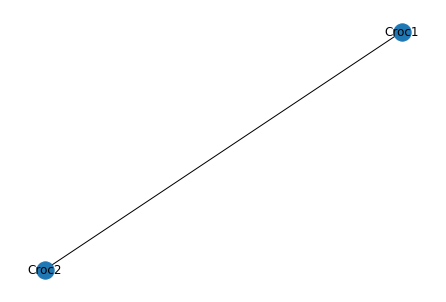

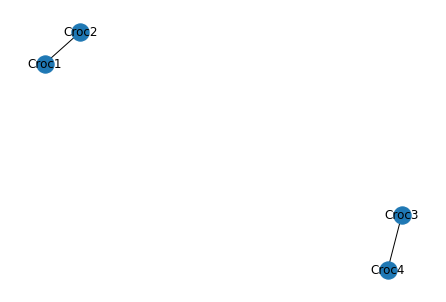

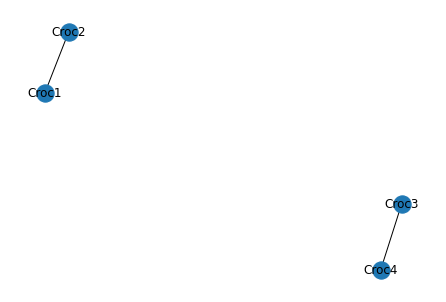

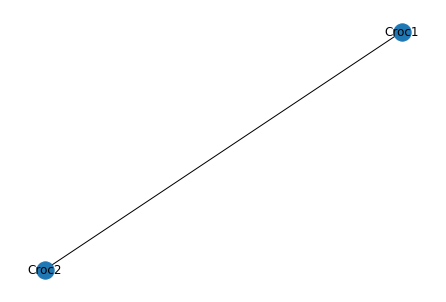

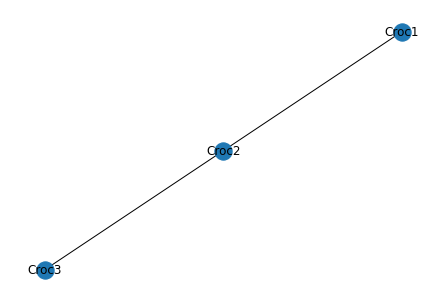

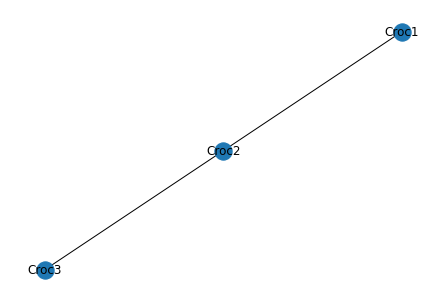

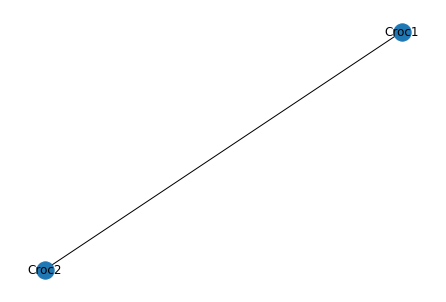

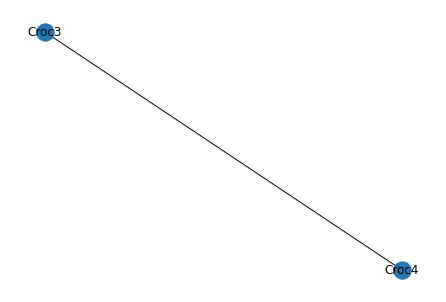

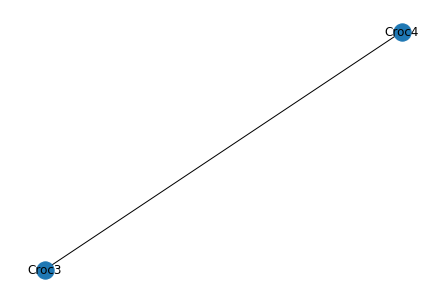

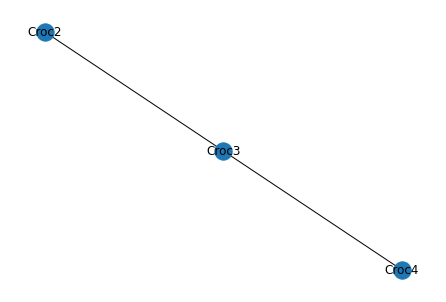

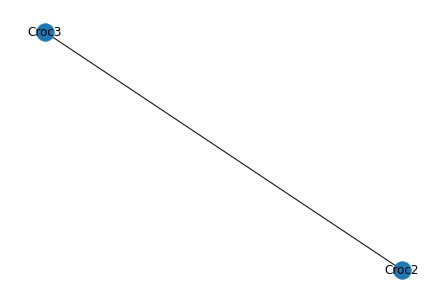

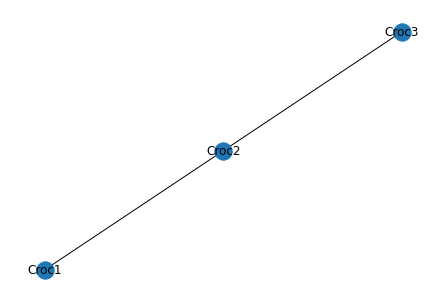

In [7]:
#plot time slices
for i in range(12):
    g1 = crocodile.time_slice(i)
    nx.draw(g1,with_labels=True)
    plt.show()

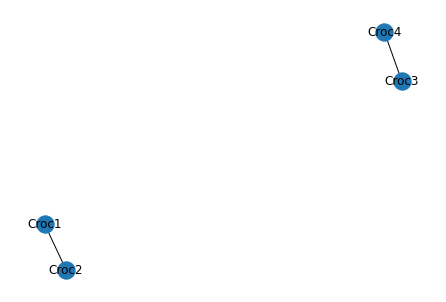

In [8]:
#slice at time t=2
g1 = crocodile.time_slice(2)
nx.draw(g1,with_labels=True)
plt.show()

In [37]:
for i in crocodile.stream_interactions():
    print(i)

('Croc1', 'Croc2', '+', 0)
('Croc3', 'Croc4', '+', 1)
('Croc2', 'Croc3', '+', 4)
('Croc1', 'Croc2', '-', 7)
('Croc3', 'Croc4', '+', 7)
('Croc2', 'Croc3', '+', 9)
('Croc3', 'Croc4', '-', 10)
('Croc1', 'Croc2', '+', 11)
('Croc2', 'Croc3', '-', 12)


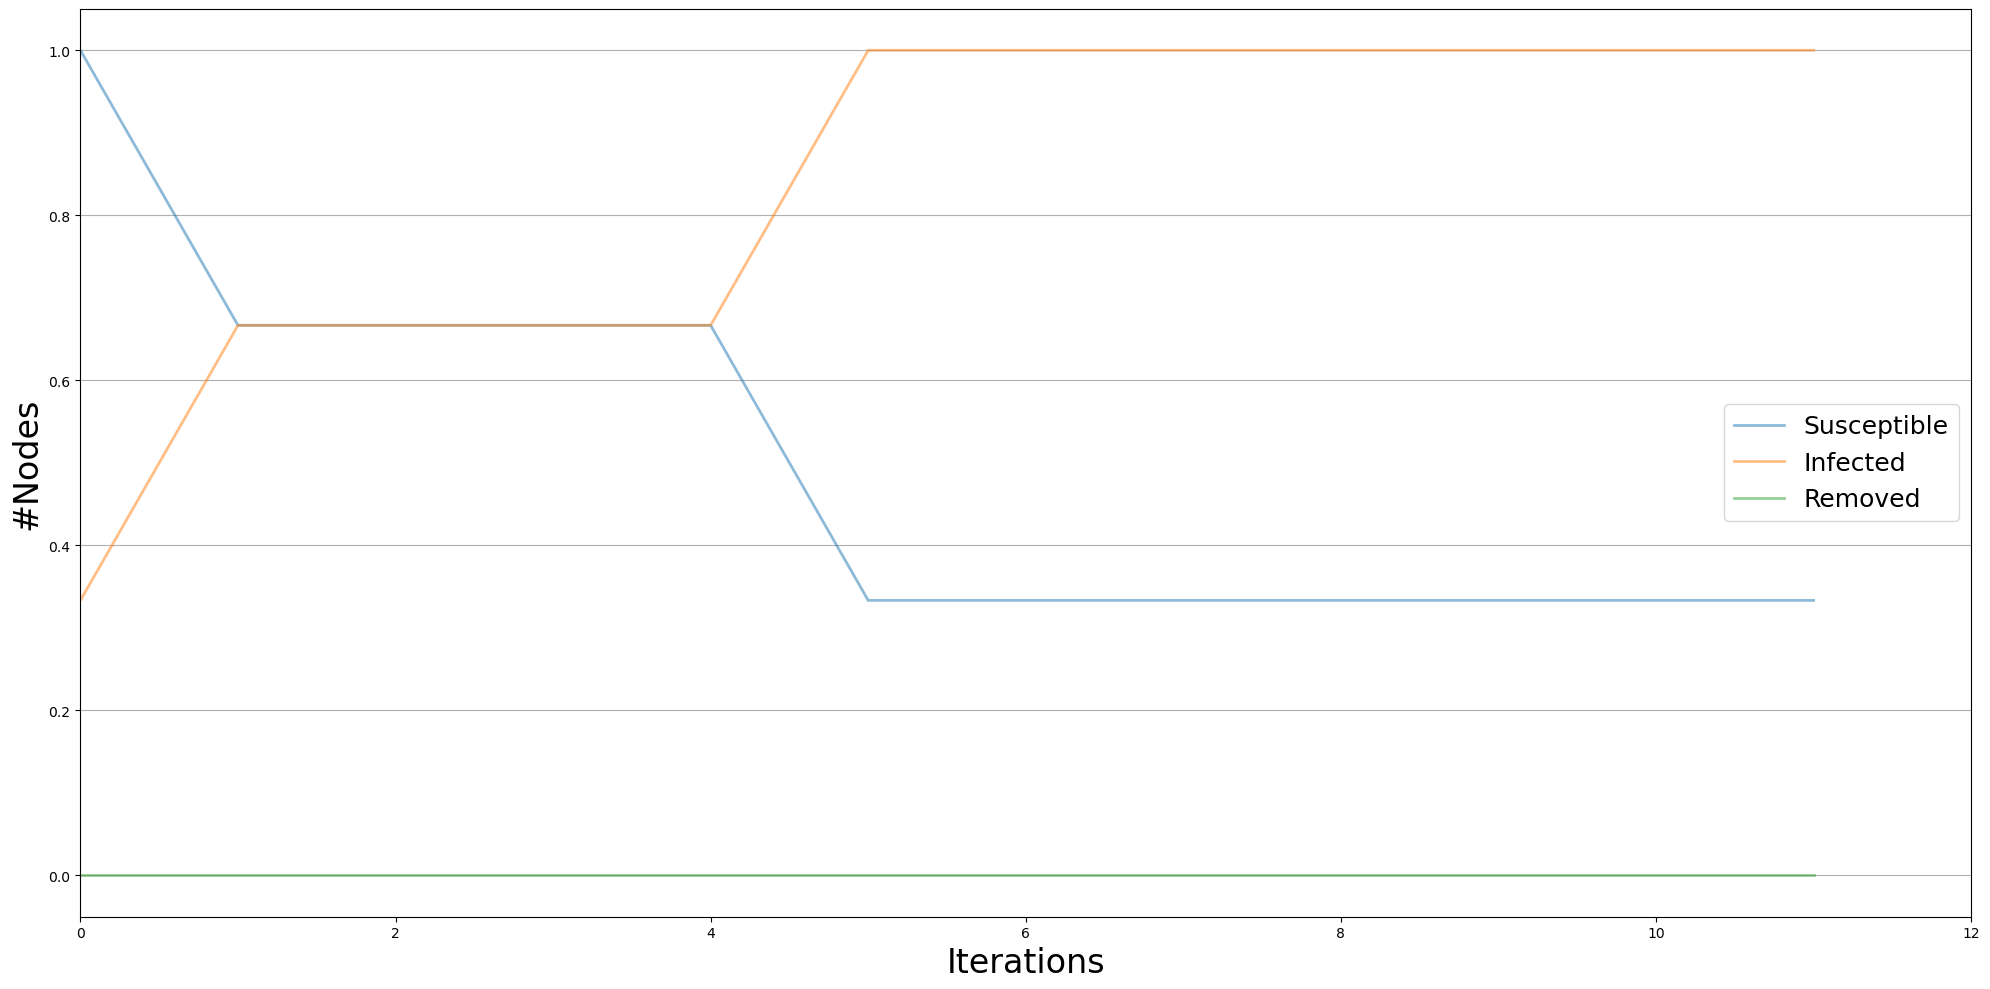

In [20]:
#run epidemic model
import ndlib.models.ModelConfig as mc
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.dynamic as dm

# model selection
model = dm.DynSIRModel(crocodile)

# model configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.3) # infection rate
config.add_model_parameter('gamma', 0.05) # recovery rate
config.add_model_parameter("percentage_infected", 0.25)
model.set_initial_status(config)

# simulate snapshot based execution
iterations = model.execute_snapshots()
#iterations = model.execute_iterations()
trends = model.build_trends(iterations)

#visualize trends
viz = DiffusionTrend(model, trends)
viz.plot()

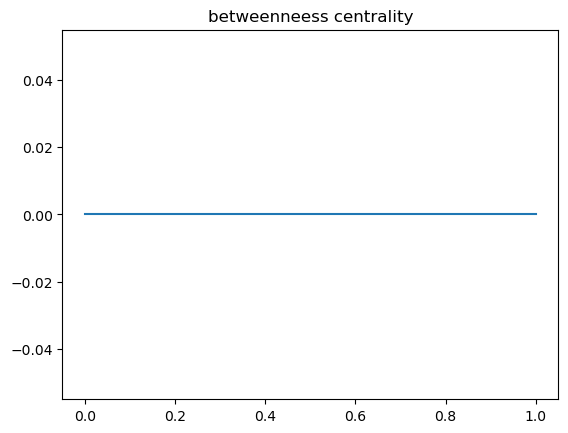

timestamp =  0 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



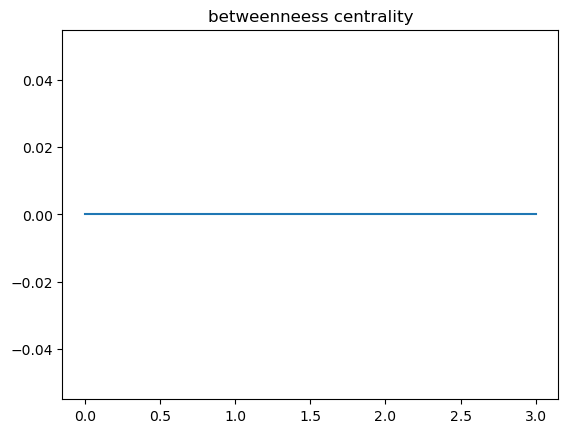

timestamp =  1 , nodes = 4 , max degree =  1
Infinite value observed.



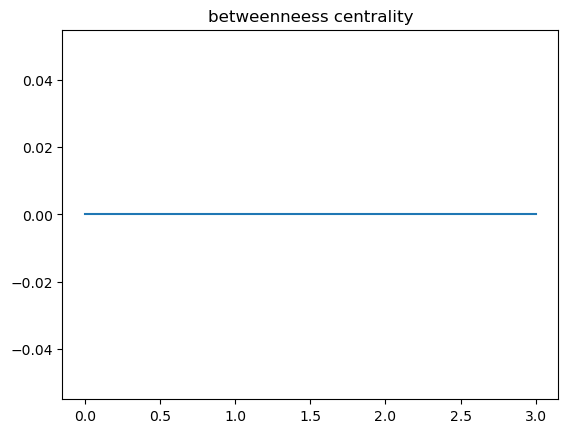

timestamp =  2 , nodes = 4 , max degree =  1
Infinite value observed.



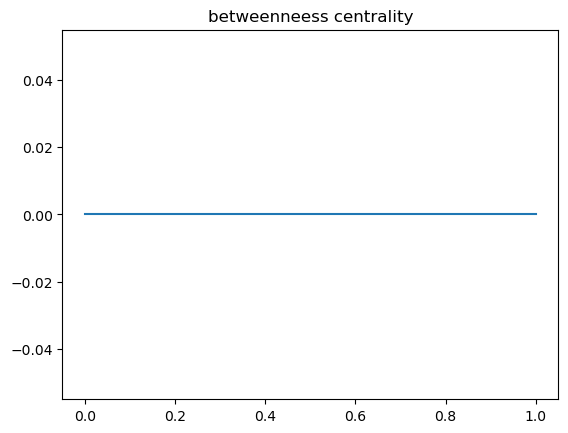

timestamp =  3 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



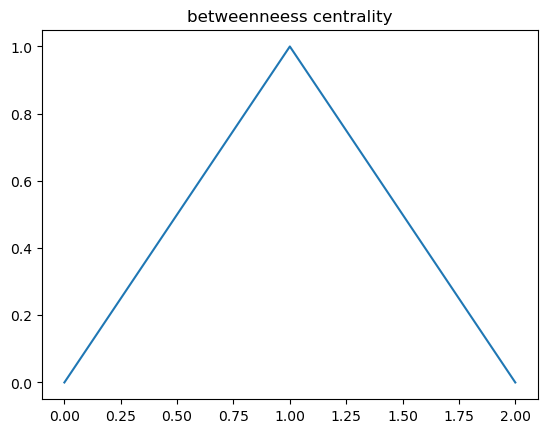

timestamp =  4 , nodes = 3 , max degree =  2
diameter =  2
radius =  1



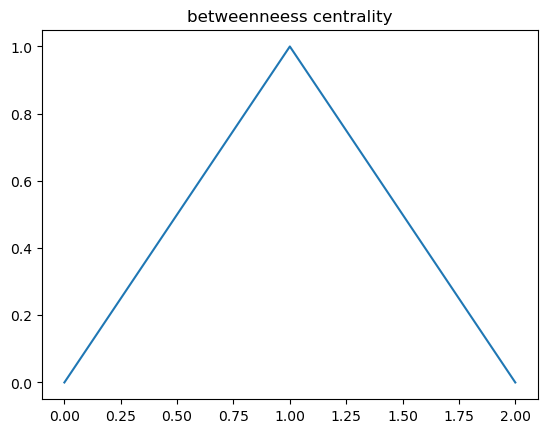

timestamp =  5 , nodes = 3 , max degree =  2
diameter =  2
radius =  1



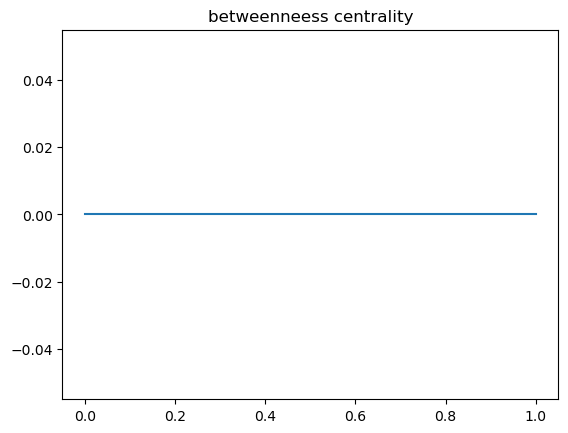

timestamp =  6 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



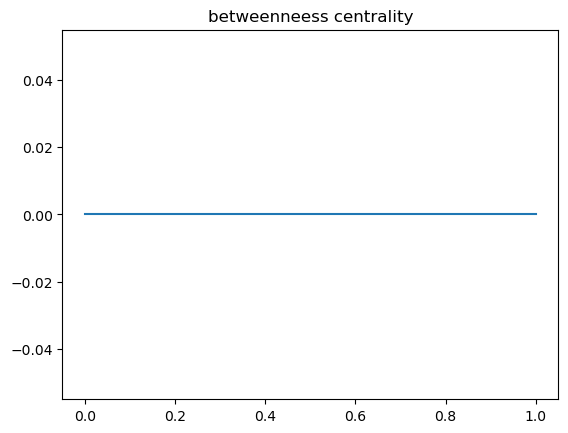

timestamp =  7 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



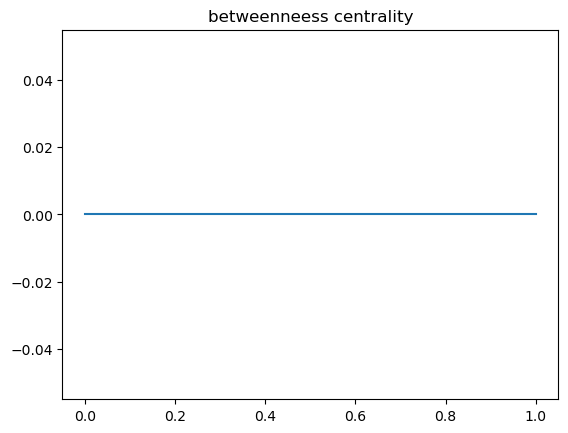

timestamp =  8 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



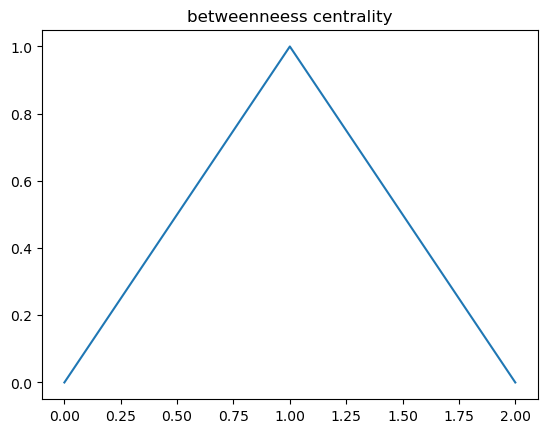

timestamp =  9 , nodes = 3 , max degree =  2
diameter =  2
radius =  1



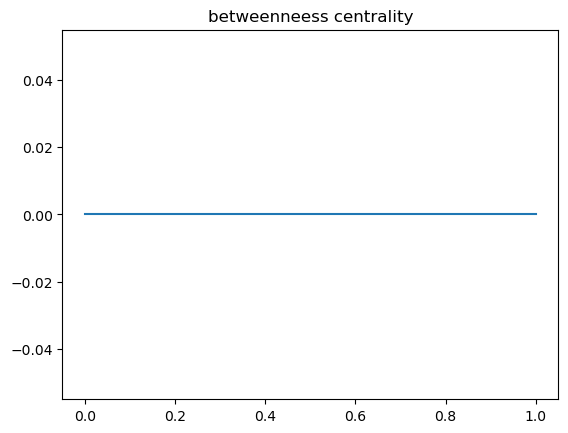

timestamp =  10 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



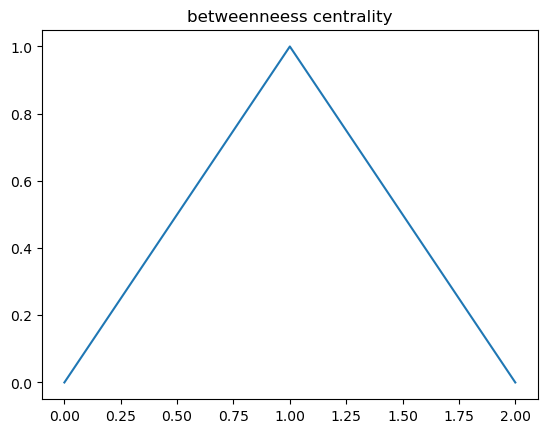

timestamp =  11 , nodes = 3 , max degree =  2
diameter =  2
radius =  1


In [39]:
#obtain network centrality statistics for crocodile network
for i in range(12):
    dg = crocodile.time_slice(i)
    try:
        dd = nx.betweenness_centrality(dg)# computing betweenness centrality
        plt.plot(dd.values())
        plt.title("betweenneess centrality")
        print()
        plt.show()
        print ("timestamp = ", i,",", "nodes =", len(dg.nodes()),",", "max degree = ",max(dg.degree().values()))
        print ("diameter = ", nx.diameter(dg))
        print ("radius = ", nx.radius(dg))
    except:
        print('Infinite value observed.')

Script 8-3: Blue heron interactions

In [4]:
#create empty graph
blue_heron = dn.DynGraph() # empty dynamic graph

In [5]:
#add relevant interactions
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h3","h4"),("h4","h5")],t=0)
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h3","h4"),("h5","h6")],t=1)
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h5","h6"),("h6","h7")],t=2)
blue_heron.add_interactions_from([("h1","h2"),("h3","h4"),("h6","h7")],t=3)
blue_heron.add_interactions_from([("h2","h3"),("h3","h4"),("h4","h5"),("h6","h7")],t=4)
blue_heron.add_interactions_from([("h3","h4")],t=5)
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h3","h4"),("h4","h5"),("h5","h6")],t=6)
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h3","h4"),("h4","h5"),("h5","h6"),("h6","h7")], t=7)
blue_heron.add_interactions_from([("h1","h2"),("h2","h3"),("h3","h4"),("h5","h6"),("h6","h7")],t=8)
blue_heron.add_interactions_from([("h1","h2"),("h3","h4"),("h5","h6"),("h6","h7")],t=9)

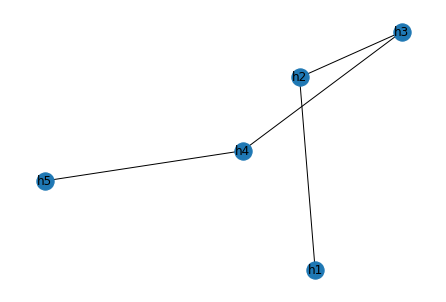

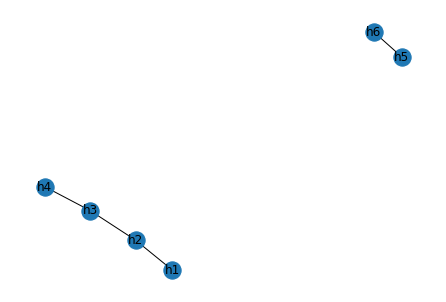

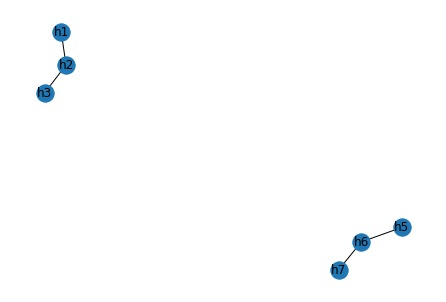

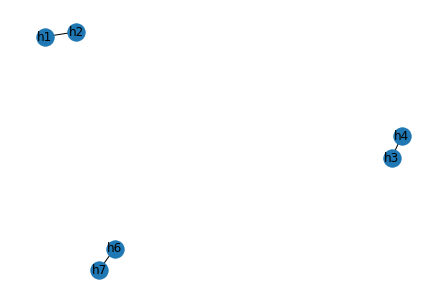

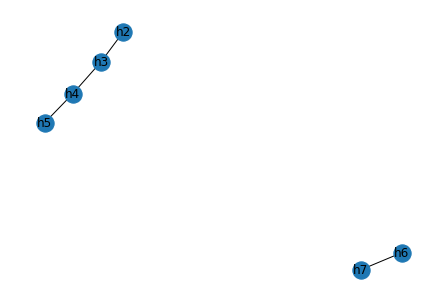

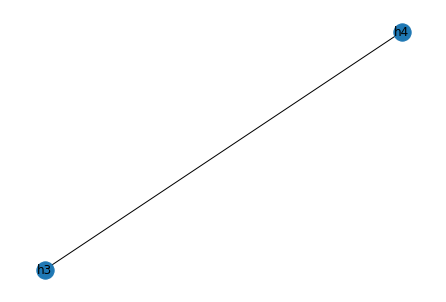

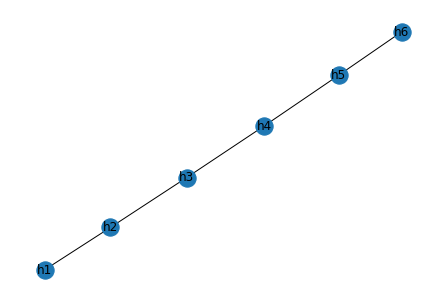

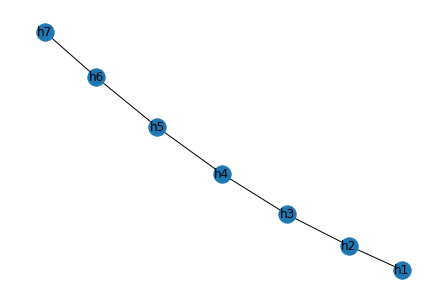

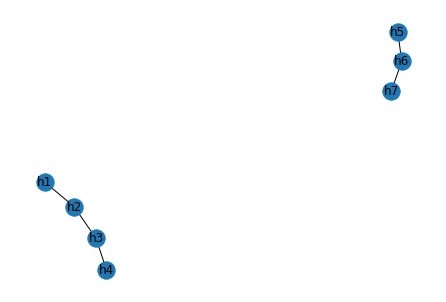

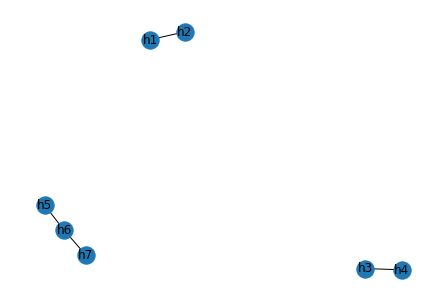

In [6]:
#plot network over time
for i in range(10):
    g1 = blue_heron.time_slice(i)
    nx.draw(g1,with_labels=True)
    #print()
    plt.show()

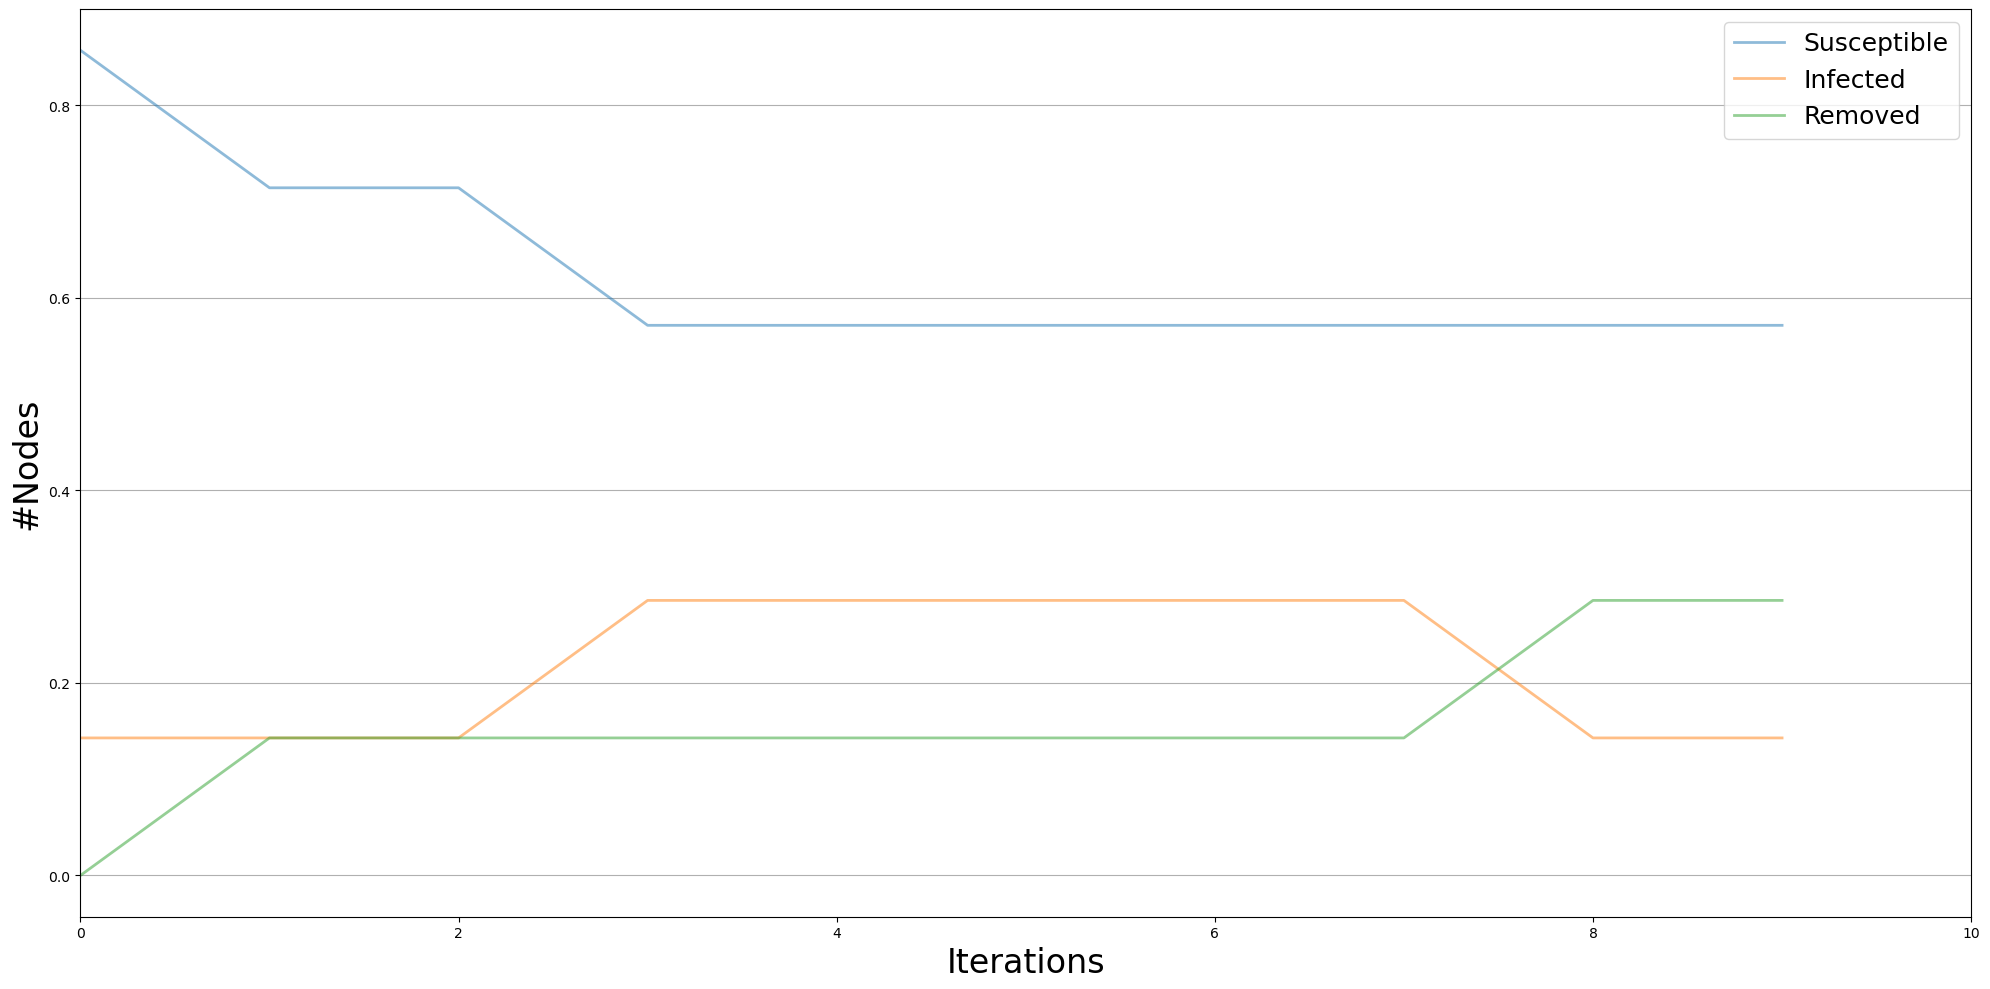

In [19]:
#run epidemic model
import ndlib.models.ModelConfig as mc
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
#from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import ndlib.models.dynamic as dm

# model selection
model = dm.DynSIRModel(blue_heron)

# model configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.4) # infection rate
config.add_model_parameter('gamma', 0.2) # recovery rate
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)

# simulate snapshot based execution
iterations = model.execute_snapshots()
#iterations = model.execute_iterations()
trends = model.build_trends(iterations)

#visualize trends
viz = DiffusionTrend(model, trends)
viz.plot()

Script 8-4: derive network centrality statistics for crocodile and blue heron networks

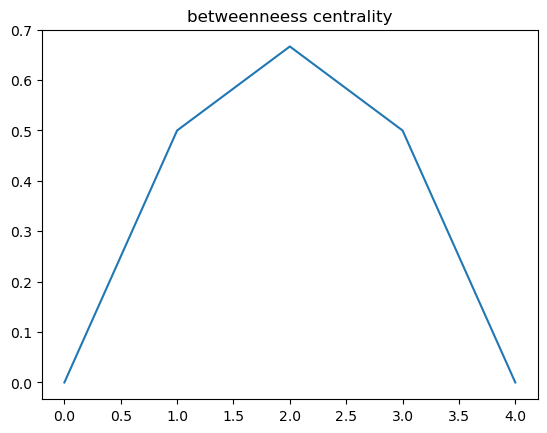

timestamp =  0 , nodes = 5 , max degree =  2
diameter =  4
radius =  2



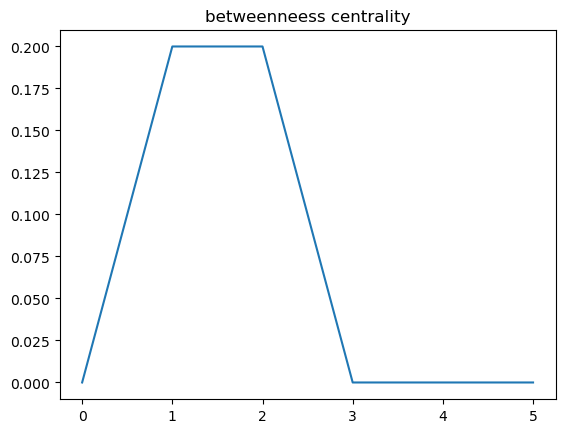

timestamp =  1 , nodes = 6 , max degree =  2
Infinite value observed.



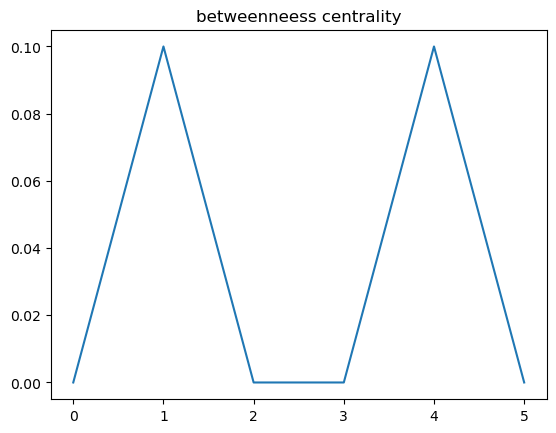

timestamp =  2 , nodes = 6 , max degree =  2
Infinite value observed.



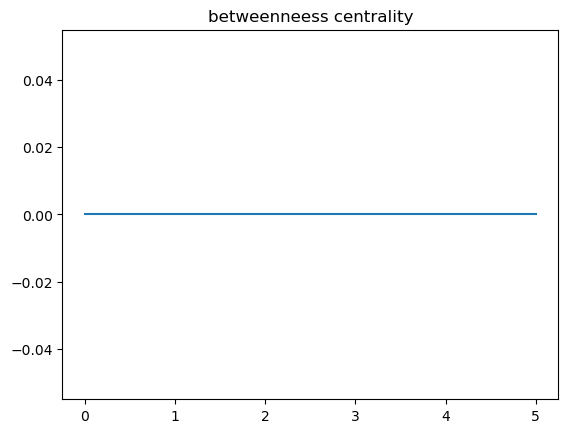

timestamp =  3 , nodes = 6 , max degree =  1
Infinite value observed.



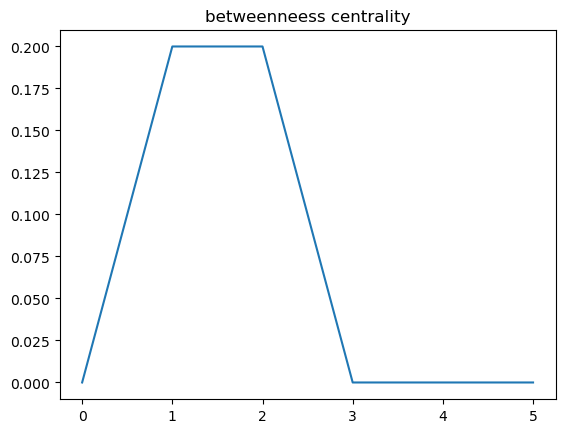

timestamp =  4 , nodes = 6 , max degree =  2
Infinite value observed.



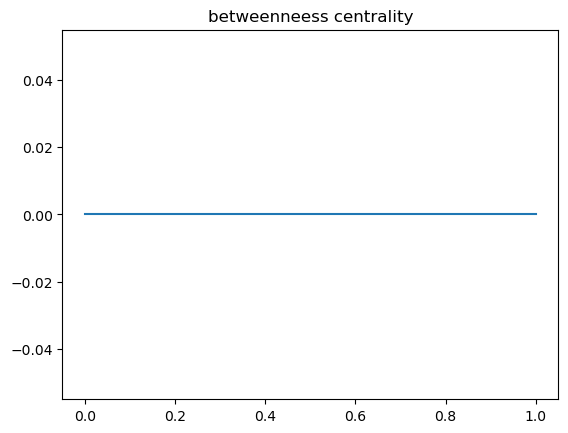

timestamp =  5 , nodes = 2 , max degree =  1
diameter =  1
radius =  1



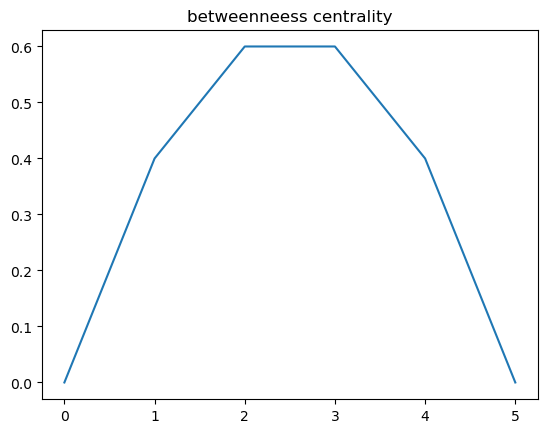

timestamp =  6 , nodes = 6 , max degree =  2
diameter =  5
radius =  3



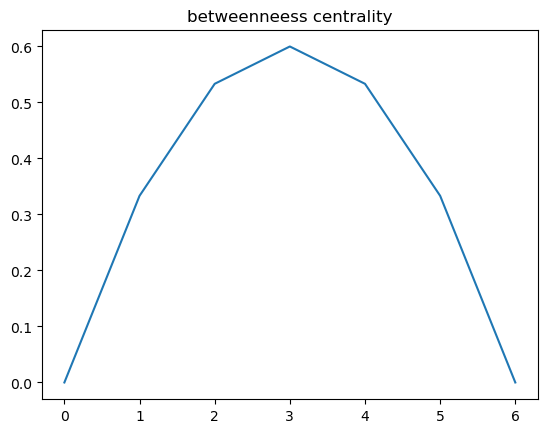

timestamp =  7 , nodes = 7 , max degree =  2
diameter =  6
radius =  3



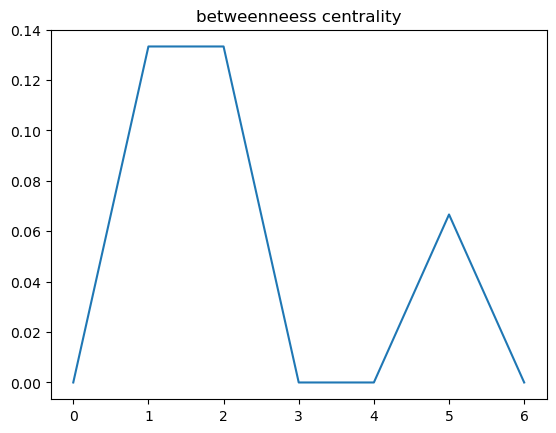

timestamp =  8 , nodes = 7 , max degree =  2
Infinite value observed.



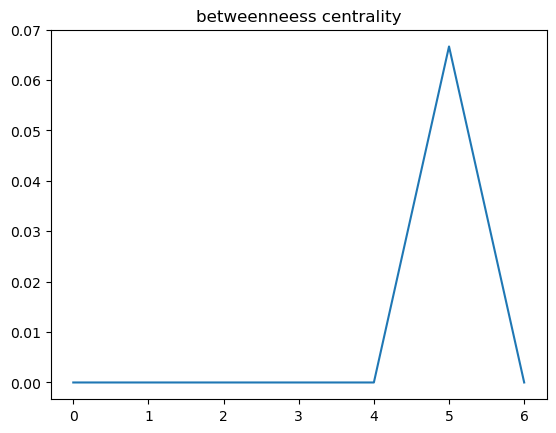

timestamp =  9 , nodes = 7 , max degree =  2
Infinite value observed.


In [35]:
#obtain network centrality statistics for blue heron network
for i in range(10):
    dg = blue_heron.time_slice(i)
    try:
        dd = nx.betweenness_centrality(dg)# computing betweenness centrality
        plt.plot(dd.values())
        plt.title("betweenneess centrality")
        print()
        plt.show()
        print ("timestamp = ", i,",", "nodes =", len(dg.nodes()),",", "max degree = ",max(dg.degree().values()))
        print ("diameter = ", nx.diameter(dg))
        print ("radius = ", nx.radius(dg))
    except:
        print('Infinite value observed.')